# Test Block for Regression

In [1]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102',
                 '202103']

o = open_files(initial_panel=initial_panel)
DFA = o.open_panel_df(name='imputed_and_deleted_missing')
DFD = o.open_panel_df(name='dev_index_geocoded')
DFL = o.open_panel_df(name='niche_labels_combined_panels')

In [2]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

new_class_obj = combine_dataframes(
                 initial_panel=initial_panel,
                 all_panels=all_panels,
                 consec_panels=consec_panels,
                 appid_imputed_and_deleted_missing_df=DFA,
                 dev_index_gecoded_df=DFD,
                 appid_text_cluster_labeled_df=DFL)

df = new_class_obj.combine_imputed_deleted_missing_with_text_labels()

reg_class_obj = regression_analysis(
    df=df,
    initial_panel=initial_panel,
    consec_panels=consec_panels)

03/14/21 </br>
I need to remove ratings because reviews and ratings are highly correlated, 0.98
which results in multicolinearity.


In [3]:
# dependent variable is containsAdsTrue
time_variant_vars = ['score',
                        'ZSCOREreviews',
                        'minInstallsTop',
                        'minInstallsMiddle']
demaned_time_variant_vars = ['DeMeanedscore',
                        'DeMeanedZSCOREreviews',
                        'DeMeanedminInstallsTop',
                        'DeMeanedminInstallsMiddle']
time_invariant_vars = ['niche_app',
                       'genreIdGame',
                       'contentRatingAdult',
                       'days_since_released']
dep_vars = ['paidTrue', 'offersIAPTrue', 'containsAdsTrue', 'price']
reg_types = ['POOLED_OLS']

In [4]:
d1 = reg_class_obj.create_new_dummies_from_cat_var(
    cat_var='free').create_new_dummies_from_cat_var(
    cat_var='containsAds').create_new_dummies_from_cat_var(
    cat_var='offersIAP').create_new_dummies_from_cat_var(
    cat_var='minInstalls').create_new_dummies_from_cat_var(
    cat_var='contentRating',
    time_invariant=True).create_new_dummies_from_cat_var(
    cat_var='genreId',
    time_invariant=True).standardize_continuous_vars(
    con_var='reviews',
    method='zscore').create_individual_app_dummies(
    ).create_demean_time_variant_vars(
    time_variant_vars = time_variant_vars).count_number_of_days_since(
    var='released').convert_df_from_wide_to_long(
    time_variant_vars = time_variant_vars,
    demaned_time_variant_vars = demaned_time_variant_vars,
    time_invariant_vars = time_invariant_vars,
    dep_vars = dep_vars)

before standardization:
reviews_202009
count    9.776000e+03
mean     7.827094e+04
std      5.439244e+05
min      0.000000e+00
25%      2.950000e+02
50%      3.119000e+03
75%      2.383850e+04
max      2.951514e+07
Name: reviews_202009, dtype: float64

reviews_202010
count    9.776000e+03
mean     7.933480e+04
std      5.519371e+05
min      0.000000e+00
25%      3.000000e+02
50%      3.183500e+03
75%      2.422675e+04
max      3.023292e+07
Name: reviews_202010, dtype: float64

reviews_202011
count    9.776000e+03
mean     8.065345e+04
std      5.625741e+05
min      0.000000e+00
25%      3.050000e+02
50%      3.256500e+03
75%      2.470575e+04
max      3.119757e+07
Name: reviews_202011, dtype: float64

reviews_202012
count    9.776000e+03
mean     8.208672e+04
std      5.744714e+05
min      0.000000e+00
25%      3.110000e+02
50%      3.313500e+03
75%      2.519250e+04
max      3.231515e+07
Name: reviews_202012, dtype: float64

reviews_202101
count    9.776000e+03
mean     8.314799e+04
s

KeyError: "['days_since_released'] not in index"

In [28]:
results_dict = d1.several_regressions(
    dep_vars=dep_vars,
    time_variant_vars=demaned_time_variant_vars,
    time_invariant_vars=time_invariant_vars,
    cross_section=False,
    reg_types=reg_types,
    the_panel='202103')

In [29]:
res = d1.compare_several_panel_reg_results(results_dict=results_dict,
                                           dep_vars=dep_vars)
final_df = d1.compile_several_reg_results_into_pandas(panels_compare=res)

            Model Comparison           
                             POOLED_OLS
---------------------------------------
Dep. Variable                  paidTrue
Estimator                     PooledOLS
No. Observations                  68432
Cov. Est.                     Clustered
R-squared                        0.0560
R-Squared (Within)               0.0047
R-Squared (Between)              0.0561
R-Squared (Overall)              0.0560
F-statistic                      507.02
P-value (F-stat)                 0.0000
=========================== ===========
const                            0.3112
                               (18.744)
DeMeanedscore                    0.0007
                               (0.6666)
DeMeanedZSCOREreviews         4.922e-05
                               (1.1145)
DeMeanedminInstallsTop          -0.0429
                              (-1.7202)
DeMeanedminInstallsMiddle       -0.0429
                              (-1.7199)
niche_app                       -0.1663


In [30]:
df4 = d1.customize_reg_results_pandas_before_output_latex(
    df=final_df,
    selective_dep_vars=['paidTrue', 'offersIAPTrue', 'containsAdsTrue', 'price'],
    selective_reg_types=['POOLED_OLS'],
    p_value_as_asterisk=True)

In [31]:
df5 = d1.output_reg_results_pandas_to_latex(
    df=df4,
    the_reg_type='POOLED_OLS')


# descriptive stats test block

In [7]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103']
consec_panels = ['202009', '202010', '202011', '202012', '202101', '202102',
                 '202103']

o = open_files(initial_panel=initial_panel)
DFA = o.open_panel_df(name='imputed_and_deleted_missing')
DFD = o.open_panel_df(name='dev_index_geocoded')
DFL = o.open_panel_df(name='niche_labels_combined_panels')

In [27]:
%run -i 'STEP0_paths_open_save.py'
%run -i 'STEP4_Regression.py'

new_class_obj = combine_dataframes(
                 initial_panel=initial_panel,
                 all_panels=all_panels,
                 consec_panels=consec_panels,
                 appid_imputed_and_deleted_missing_df=DFA,
                 dev_index_gecoded_df=DFD,
                 appid_text_cluster_labeled_df=DFL)

df = new_class_obj.combine_imputed_deleted_missing_with_text_labels()

reg_class_obj = regression_analysis(
    df=df,
    initial_panel=initial_panel,
    consec_panels=consec_panels)

In [28]:
# dependent variable is containsAdsTrue
time_variant_vars = ['score',
                        'ZSCOREreviews',
                        'minInstallsTop',
                        'minInstallsMiddle',
                        'minInstallsBottom']
demaned_time_variant_vars = ['DeMeanedscore',
                        'DeMeanedZSCOREreviews',
                        'DeMeanedminInstallsTop',
                        'DeMeanedminInstallsMiddle',
                        'DeMeanedminInstallsBottom']
time_invariant_vars = ['niche_app',
                       'genreIdGame',
                       'contentRatingAdult',
                       'DaysSinceReleased']
dep_vars = ['paidTrue', 'offersIAPTrue', 'containsAdsTrue', 'price']
reg_types = ['POOLED_OLS']

In [29]:
d1 = reg_class_obj.create_new_dummies_from_cat_var(
    cat_var='free').create_new_dummies_from_cat_var(
    cat_var='containsAds').create_new_dummies_from_cat_var(
    cat_var='offersIAP').create_new_dummies_from_cat_var(
    cat_var='minInstalls').create_new_dummies_from_cat_var(
    cat_var='contentRating',
    time_invariant=True).create_new_dummies_from_cat_var(
    cat_var='genreId',
    time_invariant=True).standardize_continuous_vars(
    con_var='reviews',
    method='zscore').create_individual_app_dummies(
    ).create_demean_time_variant_vars(
    time_variant_vars = time_variant_vars).count_number_of_days_since(
    var='released').convert_df_from_wide_to_long(
    time_variant_vars = time_variant_vars,
    demaned_time_variant_vars = demaned_time_variant_vars,
    time_invariant_vars = time_invariant_vars,
    dep_vars = dep_vars)

before standardization:
reviews_202009
count    9.776000e+03
mean     7.827094e+04
std      5.439244e+05
min      0.000000e+00
25%      2.950000e+02
50%      3.119000e+03
75%      2.383850e+04
max      2.951514e+07
Name: reviews_202009, dtype: float64

reviews_202010
count    9.776000e+03
mean     7.933480e+04
std      5.519371e+05
min      0.000000e+00
25%      3.000000e+02
50%      3.183500e+03
75%      2.422675e+04
max      3.023292e+07
Name: reviews_202010, dtype: float64

reviews_202011
count    9.776000e+03
mean     8.065345e+04
std      5.625741e+05
min      0.000000e+00
25%      3.050000e+02
50%      3.256500e+03
75%      2.470575e+04
max      3.119757e+07
Name: reviews_202011, dtype: float64

reviews_202012
count    9.776000e+03
mean     8.208672e+04
std      5.744714e+05
min      0.000000e+00
25%      3.110000e+02
50%      3.313500e+03
75%      2.519250e+04
max      3.231515e+07
Name: reviews_202012, dtype: float64

reviews_202101
count    9.776000e+03
mean     8.314799e+04
s

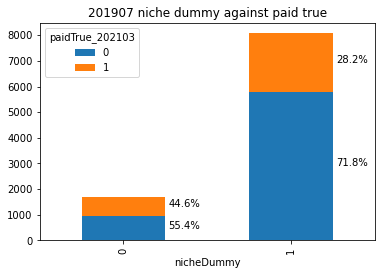

In [30]:
df3 = d1.text_cluster_relationship_to_keyvars(
    the_panel='202103',
    top_n_as_niche=4)

In [13]:
df4 = df3[0]
ls = list(df4.index.values)
print(ls)
df5 = df3[1]
df5['nicheDummy'] = df5['combined_panels_kmeans_labels'].apply(lambda x: 0 if x in ls else 1)

[7, 350, 263, 282]


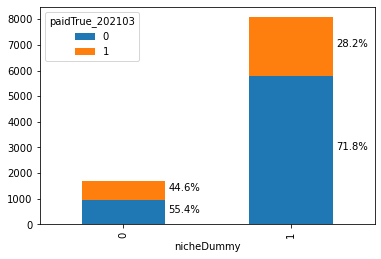

In [26]:
df6 = df5.groupby(['nicheDummy', 'paidTrue_202103']).size()
ax = df6.unstack().plot.bar(stacked=True)

total_1=0
total_2=0
for p in ax.patches:
    if p.xy[0] == -0.25:
        total_1 += p.get_height()
    elif p.xy[0] == 0.75:
        total_2 += p.get_height()
for p in ax.patches:
    if p.xy[0] == -0.25:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    elif p.xy[0] == 0.75:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_2)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

In [ ]:
df = d1.key_var_definition()

In [7]:
d2 = d1.descriptive_stats_for_single_panel(
    continuous_vars=['score',
                     'DeMeanedscore',
                     'reviews',
                     'ZSCOREreviews',
                     'DeMeanedZSCOREreviews',
                     'price',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'DeMeanedminInstallsBottom'],
    dummy_vars = ['paidTrue',
                  'offersIAPTrue',
                  'containsAdsTrue',
                  'minInstallsTop',
                  'minInstallsMiddle',
                  'minInstallsBottom'],
    cat_vars = ['genreId',
                'minInstalls'],
    time_invar_dum=['niche_app',
                    'genreIdGame',
                    'contentRatingAdult'],
    time_invar_con=['days_since_released'],
    the_panel='202103',
    add_sum_row_col=True)

In [23]:
df6 = d1.customize_and_output_descriptive_stats_pandas_to_latex(
    the_panel='202103')

In [21]:
var_latex_map = {
           'const': 'constant',
           'score': '\makecell[l]{rating \\\ (1-5)}',
           'DeMeanedscore': '\makecell[l]{demeaned \\\ rating (1-5)}',
           'reviews': '\makecell[l]{number of \\\ reviews}',
           'ZSCOREreviews': '\makecell[l]{number of \\\ reviews (z-score)}',
           'DeMeanedZSCOREreviews': '\makecell[l]{number of reviews \\\ (demeaned z-score)}',
           'minInstallsTop': '\makecell[l]{min installs \\\ above 10,000,000}',
           'DeMeanedminInstallsTop': '\makecell[l]{min installs \\\ above 10,000,000 \\\ (demeaned)}',
           'minInstallsMiddle': '\makecell[l]{min installs between \\\ 10,000 and 10,000,000}',
           'DeMeanedminInstallsMiddle': '\makecell[l]{min installs between \\\ 10,000 and 10,000,000 \\\ (demeaned)}',
           'minInstallsBottom': '\makecell[l]{min installs \\\ below 10,000}',
           'DeMeanedminInstallsBottom': '\makecell[l]{min installs \\\ below 10,000 \\\ (demeaned)}',
           'niche_app': 'niche app',
           'genreIdGame': 'hedonic app',
           'contentRatingAdult': '\makecell[l]{contains age \\\ restrictive contents}',
           'days_since_released': '\makecell[l]{number of days \\\ since released}',
           'paidTrue': 'paid',
           'offersIAPTrue': 'offers IAP',
           'containsAdsTrue': 'contains ads',
           'price': 'price',
           'F stat': 'F statistic',
           'P-value': 'P Value',
           'rsquared': 'R Squared',
           'nobs': '\makecell[l]{number of \\\ observations}',
           '_cov_type': 'covariance type'}

In [22]:
# debug cell
df7 = df6.copy(deep=True)
the_panel = '202103'
for i in df7.index:
    if the_panel in i:
        i = i.rstrip(the_panel).rstrip('_')
        print(i)
    for j in var_latex_map.keys():
        if j == i:
            print(j)
            x = var_latex_map[j]
            print(x)
            df7.rename(index={i: x}, inplace=True)

niche_app
niche app
price
price
price
paidTrue
paidTrue
paid
offersIAPTrue
offersIAPTrue
offers IAP
containsAdsTrue
containsAdsTrue
contains ads
genreIdGame
hedonic app
contentRatingAdult
\makecell[l]{contains age \\ restrictive contents}
days_since_released
\makecell[l]{number of days \\ since released}
minInstallsTop
minInstallsTop
\makecell[l]{min installs \\ above 10,000,000}
DeMeanedminInstallsTop
DeMeanedminInstallsTop
\makecell[l]{min installs \\ above 10,000,000 \\ (demeaned)}
minInstallsMiddle
minInstallsMiddle
\makecell[l]{min installs between \\ 10,000 and 10,000,000}
DeMeanedminInstallsMiddle
DeMeanedminInstallsMiddle
\makecell[l]{min installs between \\ 10,000 and 10,000,000 \\ (demeaned)}
minInstallsBottom
minInstallsBottom
\makecell[l]{min installs \\ below 10,000}
DeMeanedminInstallsBottom
DeMeanedminInstallsBottom
\makecell[l]{min installs \\ below 10,000 \\ (demeaned)}
score
score
\makecell[l]{rating \\ (1-5)}
DeMeanedscore
DeMeanedscore
\makecell[l]{demeaned \\ ratin

In [25]:
the_panel = '202103'
def set_row_names(x, the_panel):
    if the_panel in x:
        x = x.rstrip(the_panel).rstrip('_')
    for j in var_latex_map.keys():
        if j == x:
            return var_latex_map[j]


df7 = df6.copy(deep=True)
df7 = df7.reset_index()
df7['Variable'] = df7['Variable'].apply(lambda x: set_row_names(x, the_panel))
df7 = df7.set_index('Variable')

In [39]:
import functools
import copy
dummy_vars = ['paidTrue',
              'offersIAPTrue',
              'containsAdsTrue',
              'minInstallsTop',
              'minInstallsMiddle',
              'minInstallsBottom']
continuous_vars=['score',
                 'DeMeanedscore',
                 'reviews',
                 'ZSCOREreviews',
                 'DeMeanedZSCOREreviews',
                 'price',
                 'DeMeanedminInstallsTop',
                 'DeMeanedminInstallsMiddle',
                 'DeMeanedminInstallsBottom']
time_invar_dum=['niche_app',
                'genreIdGame',
                'contentRatingAdult']
time_invar_con=['days_since_released']
con_vars = [i + '_' + '202103' for i in continuous_vars]
con_vars.extend(time_invar_con)
dum_vars = [i + '_' + '202103' for i in dummy_vars]
dum_vars.extend(time_invar_dum)
con_and_dum_vars = copy.deepcopy(con_vars)
con_and_dum_vars.extend(dum_vars)
df2 = d1.df.copy(deep=True)
con_vars_df = df2[con_vars]
dum_vars_df = df2[dum_vars]
con_and_dum_df = df2[con_and_dum_vars]
con_and_dum_vars_stats = con_and_dum_df.agg(['mean', 'std', 'min', 'median', 'max', 'count'], axis=0)
con_and_dum_vars_stats = con_and_dum_vars_stats.T
dum_stats_dfs = []
for i in dum_vars:
    dum_vars_df['Count_' + i] = 0
    df = dum_vars_df[[i, 'Count_' + i]].groupby(i).count()
    dum_stats_dfs.append(df)
dum_vars_sum_stats = functools.reduce(lambda a, b: a.join(b, how='inner'), dum_stats_dfs)

In [40]:
for i in dum_vars_sum_stats.columns:
    dum_vars_sum_stats.rename(columns={i: i.lstrip('Count').lstrip('_')}, inplace=True)

In [41]:
for i in dum_vars_sum_stats.index:
    dum_vars_sum_stats.rename(index={i: str(i)+'_Count'}, inplace=True)
dum_vars_sum_stats = dum_vars_sum_stats.T
cd_sum_stats = con_and_dum_vars_stats.join(dum_vars_sum_stats, how='left')

In [7]:
df = d1.correlation_matrix(
    dep_vars,
    time_variant_vars,
    time_invariant_vars,
    the_panel='202103')

In [6]:
results_df = d1.compile_several_reg_results_into_pandas(
    results_dict=results_dict)

In [18]:
A = results_dict['FE']['paidTrue']
A.params

const                0.201449
score                0.000757
ZSCOREreviews        0.000049
minInstallsTop      -0.041543
minInstallsMiddle   -0.042199
niche_app            0.169612
Name: parameter, dtype: float64

In [ ]:
# Since I am not going to conduct pooled OLS
# lets jump into fixed effects model
# https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8
